# Introduction to Data Science: Data Cleaning

In [1]:
import json
import requests
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

## Functions

In [2]:
def grab_json(req, key=False):
    """
    Grab info specified in `spec.json`.
    
    req: str
    Returns: dict
    """
    api = "https://api.opendota.com/api"
    req = api + req
    payload = {}
    if key:
        with open("api_key.txt") as f:
            key = f.read()
        payload['api_key'] = key
        
    r = requests.get(req, params=payload)
    return r.json()

## Organize Player Data

In [3]:
player = pd.DataFrame(grab_json("/players/37244929/recentMatches"))
player.columns

Index(['match_id', 'player_slot', 'radiant_win', 'duration', 'game_mode',
       'lobby_type', 'hero_id', 'start_time', 'version', 'kills', 'deaths',
       'assists', 'skill', 'xp_per_min', 'gold_per_min', 'hero_damage',
       'tower_damage', 'hero_healing', 'last_hits', 'lane', 'lane_role',
       'is_roaming', 'cluster', 'leaver_status', 'party_size'],
      dtype='object')

In [4]:
player = player[["hero_id", "kills", "deaths", "assists", "skill", "xp_per_min", "gold_per_min", "hero_damage",
        "tower_damage", "hero_healing", "last_hits", "lane", "lane_role", "duration"]]

player.head()

,hero_id,kills,deaths,assists,skill,xp_per_min,gold_per_min,hero_damage,tower_damage,hero_healing,last_hits,lane,lane_role,duration
0,64,2,7,17,1.0,416,259,21931,359,0,74,3.0,1.0,3166
1,111,8,7,23,1.0,531,302,9329,220,7745,31,1.0,3.0,2530
2,111,1,7,9,1.0,208,153,3913,68,8797,6,3.0,1.0,2033
3,111,4,6,14,2.0,375,251,5935,74,4007,24,1.0,1.0,2201
4,64,7,6,20,2.0,509,341,22915,1254,0,84,3.0,1.0,2982


In [5]:
# TODO: make gpm, kpm, lpm

## Organize Hero Data

In [6]:
heroes = pd.DataFrame(grab_json("/heroStats"))
heroes = heroes[["id", "localized_name", "primary_attr", "attack_type", "base_health", "base_health_regen", "base_mana",
        "base_mana_regen", "base_armor", "base_mr", "base_attack_min", "base_attack_max", "base_str",
        "base_agi", "base_int", "str_gain", "int_gain", "attack_range", "projectile_speed", "attack_rate",
        "move_speed", "turn_rate"]]

heroes.head()

,id,localized_name,primary_attr,attack_type,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,...,base_str,base_agi,base_int,str_gain,int_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,Anti-Mage,agi,Melee,200,0.25,75,0.0,-1.0,25,...,23,24,12,1.3,1.8,150,0,1.4,310,0.5
1,2,Axe,str,Melee,200,2.75,75,0.0,-1.0,25,...,25,20,18,3.6,1.6,150,900,1.7,310,0.6
2,3,Bane,int,Ranged,200,NaN,75,0.0,1.0,25,...,23,23,23,2.6,2.6,400,900,1.7,305,0.6
3,4,Bloodseeker,agi,Melee,200,NaN,75,0.0,2.0,25,...,24,22,18,2.7,1.7,150,900,1.7,300,0.5
4,5,Crystal Maiden,int,Ranged,200,NaN,75,1.0,-1.0,25,...,18,16,14,2.2,3.3,600,900,1.7,275,0.5


### Turn json dictionary of hero data into pandas dataframe

#### Add player information

In [7]:
alex = {"localized_name": "Alex", "id": 130, "gold_per_min": 397, "xp_per_min": 482, "kills_per_min": 0.18601011167563136, 
        "last_hits_per_min": 3.5284033738711322, "hero_damage_per_min": 169.77512080595272, "tower_damage": 785.0421982335623}

ellis = {"localized_name": "Ellis", "id": 131, "gold_per_min": 410, "xp_per_min": 506, "kills_per_min": 0.18959957421495882, 
        "last_hits_per_min": 3.3203093203093204, "hero_damage_per_min": 446.5940953633261, "tower_damage": 2828.5667324128863}

In [8]:
hero_ids = list(heroes["id"])
stats = ['gold_per_min', 'xp_per_min', 'kills_per_min', 'last_hits_per_min', 'hero_damage_per_min', 'tower_damage']

hero_stats = []
for i, hero_id in enumerate(hero_ids):
    hero = grab_json(f"/benchmarks/?hero_id={hero_id}", key=True)
    output = {}
    output["id"] = hero_id
    output["localized_name"] = heroes.loc[i, "localized_name"]
    for stat in stats:
        output[stat] = hero['result'][stat][4]['value']
    hero_stats.append(output)

hero_stats.extend([alex, ellis])
hero_stats = pd.DataFrame(hero_stats)

In [9]:
hero_stats

,id,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,1,Anti-Mage,636,750,0.195599,9.775744,511.295956,6298.000000
1,2,Axe,396,548,0.181513,4.188679,524.611465,861.000000
2,3,Bane,256,425,0.080000,0.775444,269.588504,253.000000
3,4,Bloodseeker,484,642,0.238758,5.809711,637.667185,2948.000000
4,5,Crystal Maiden,282,444,0.078125,1.412429,360.545951,346.000000
5,6,Drow Ranger,506,635,0.196292,6.294227,615.092138,5635.000000
6,7,Earthshaker,311,481,0.096061,2.190440,393.550107,411.000000
7,8,Juggernaut,538,664,0.209607,7.268943,575.007704,4962.000000
8,9,Mirana,328,489,0.117739,2.435948,366.105611,939.000000
9,10,Morphling,529,668,0.226293,7.053140,634.846964,5244.000000


## Add player information

## Basic Plotting + Clustering

### Add hero type information

In [10]:
hero_stats.insert(0, "Primary Attribute", heroes["primary_attr"])

# special case for Alex and Ellis
hero_stats.loc[119, "Primary Attribute"] = "Alex"
hero_stats.loc[120, "Primary Attribute"] = "Ellis"

hero_stats.tail()

,Primary Attribute,id,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
116,int,126,Void Spirit,431,603,0.196137,4.650602,590.131452,1071.000000
117,str,128,Snapfire,300,451,0.116703,1.815324,423.632670,582.000000
118,str,129,Mars,380,533,0.123542,4.234136,428.318109,920.000000
119,Alex,130,Alex,397,482,0.186010,3.528403,169.775121,785.042198
120,Ellis,131,Ellis,410,506,0.189600,3.320309,446.594095,2828.566732


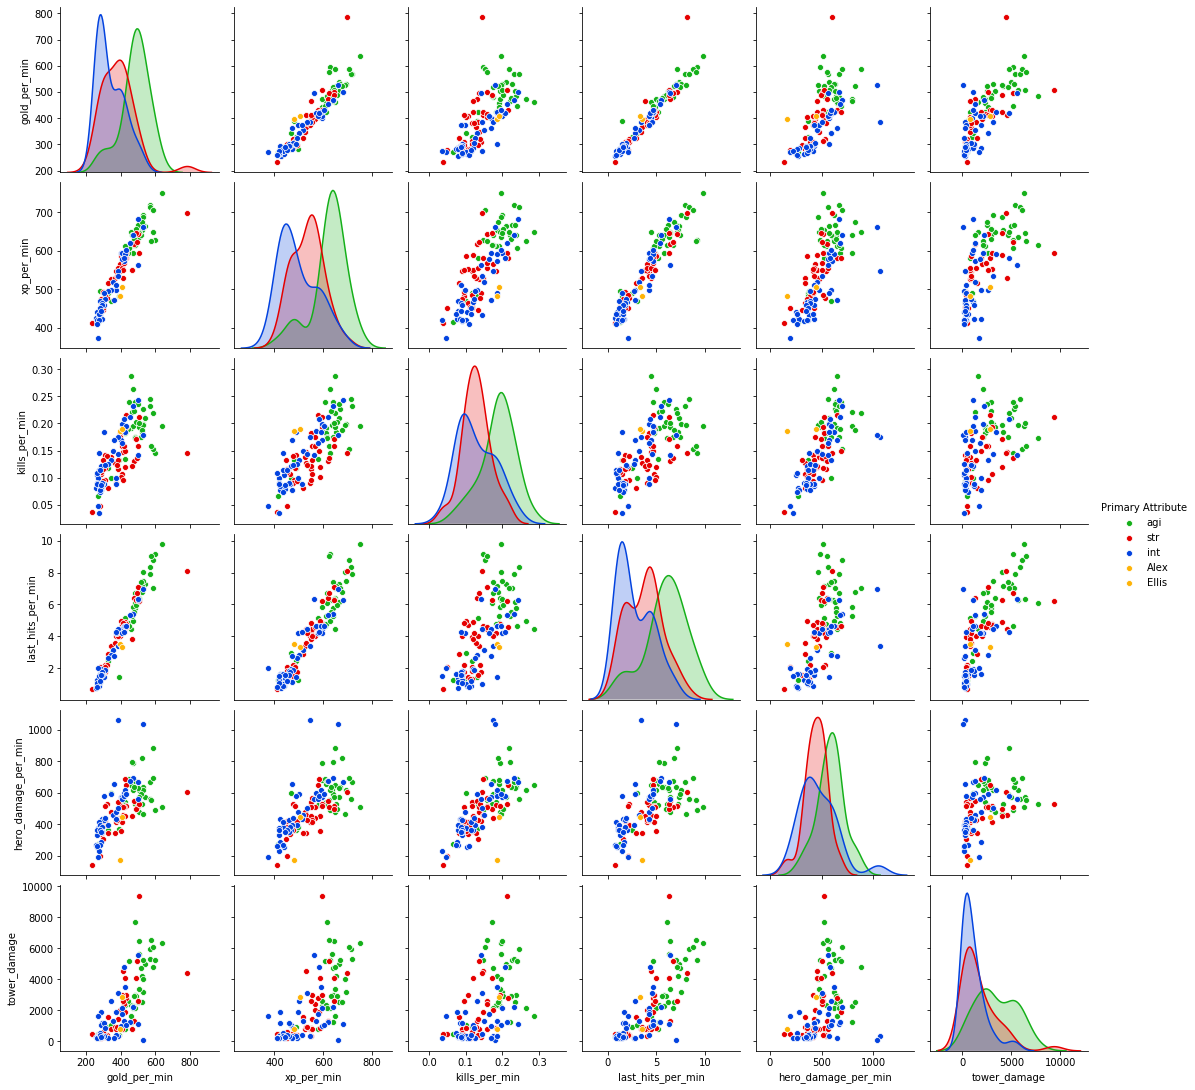

In [11]:
colors = ["green", "red", "blue", "amber", "amber"]
palette = sns.xkcd_palette(colors)

sns.pairplot(hero_stats.drop(["id", "localized_name"], axis=1), hue="Primary Attribute", 
             palette=palette);

# plt.savefig("pairplot", bbox_inches="tight")

In [12]:
hero_stats.sort_values("kills_per_min", ascending=False)

,Primary Attribute,id,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
30,agi,32,Riki,461,649,0.286707,4.469208,649.732824,1590.000000
68,agi,70,Ursa,472,626,0.263591,4.938704,616.803700,2106.000000
80,agi,82,Meepo,570,713,0.245818,8.346614,563.449275,5920.000000
16,int,17,Storm Spirit,500,682,0.243682,6.264122,667.042889,1074.000000
54,agi,56,Clinkz,446,607,0.240350,4.640246,688.218947,5161.000000
3,agi,4,Bloodseeker,484,642,0.238758,5.809711,637.667185,2948.000000
42,agi,44,Phantom Assassin,503,666,0.235043,6.163873,629.337861,2528.000000
44,agi,46,Templar Assassin,569,719,0.232408,7.895311,668.233918,5321.000000
37,int,39,Queen of Pain,469,640,0.231660,5.416459,695.081794,2219.000000
9,agi,10,Morphling,529,668,0.226293,7.053140,634.846964,5244.000000


### PCA without normalization

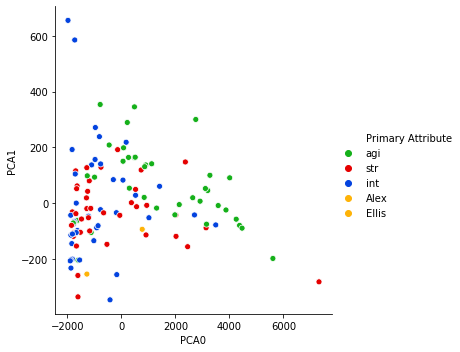

In [13]:
# clean data array
data = hero_stats.drop(["localized_name", "Primary Attribute", "id"], axis=1)

# pca
pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)

# make dataframe
pca_df = pd.DataFrame(X_r, columns=["PCA0", "PCA1"])
pca_df.insert(0, "Primary Attribute", hero_stats["Primary Attribute"])

# plot
pca1 = sns.relplot(x="PCA0", y="PCA1", hue="Primary Attribute", 
                   data=pca_df, palette=palette)
# todo / to try: different clustering methods, normalize data first, 
# figure out a way to plot so that you can figure out which hero is which
# don't plot with a huge legend

In [14]:
pca_df.head()

,Primary Attribute,PCA0,PCA1
0,agi,4249.569166,-58.056349
1,str,-1193.522097,79.663089
2,int,-1817.337165,-201.389505
3,agi,899.654932,136.623773
4,int,-1720.193423,-110.331773


### Pairplot with PCA features included

- Tower damage was almost completely linearly correlated with the first principal component
- Hero damage per minute had high linear correlation with the second

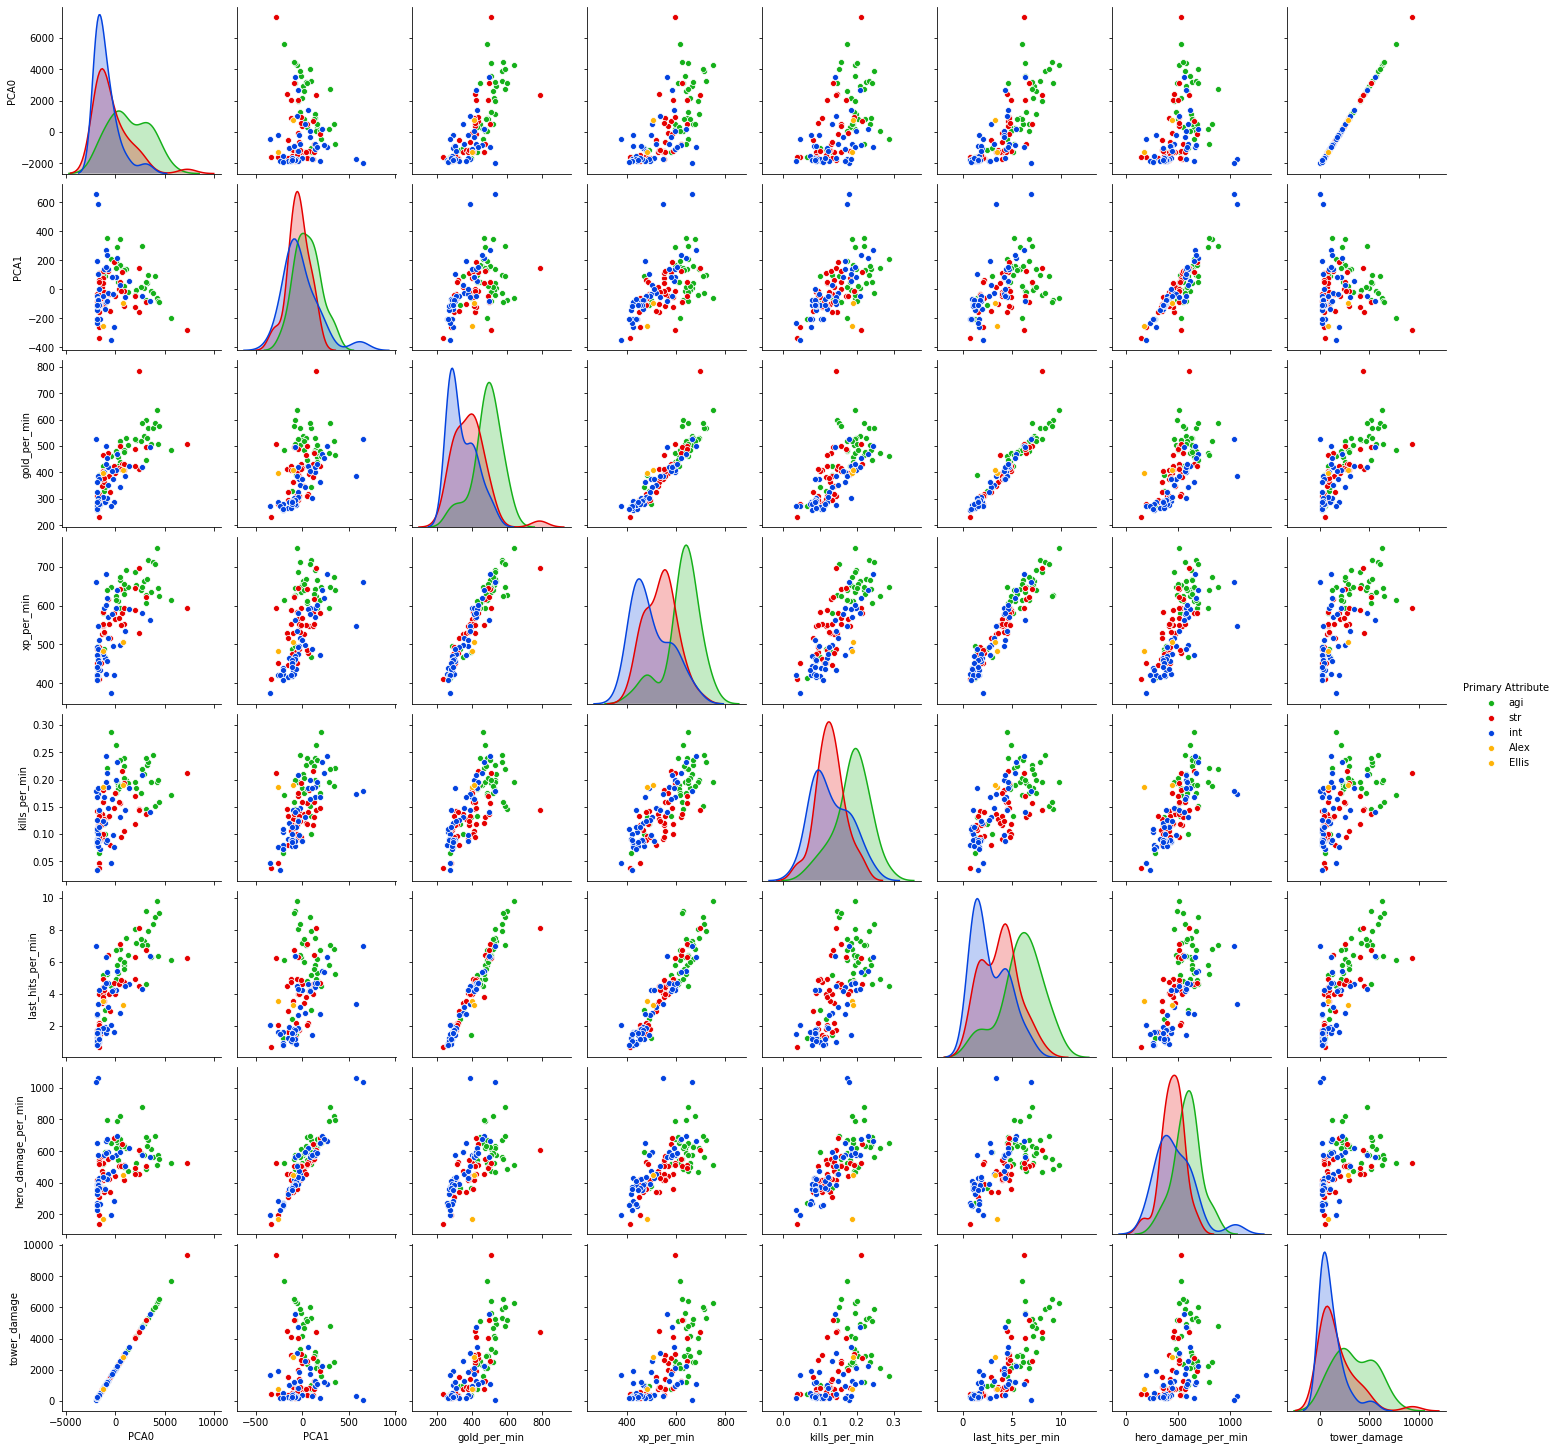

In [15]:
pairplot_data = hero_stats.drop(["localized_name", "id"], axis=1)
pairplot_data.insert(0, "PCA0", pca_df["PCA0"])
pairplot_data.insert(1, "PCA1", pca_df["PCA1"])
sns.pairplot(pairplot_data, hue="Primary Attribute", 
             palette=palette)

## Need to do some preprocessing

#### Scale data to unit mean and variance

In [16]:
from sklearn import preprocessing
scaled = pd.DataFrame(preprocessing.scale(data), columns=data.columns)
scaled.head()

,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,2.294281,2.284828,0.885816,2.485110,0.082981,2.161852
1,-0.047085,-0.016287,0.620551,0.036927,0.167249,-0.609719
2,-1.412883,-1.417461,-1.291064,-1.458711,-1.446685,-0.919654
3,0.811416,1.054529,1.698565,0.747243,0.882732,0.454152
4,-1.159234,-1.201020,-1.326373,-1.179592,-0.871053,-0.872246


### PCA with normalization

In [17]:
pca = PCA(n_components=2)
X_r = pca.fit(scaled).transform(scaled)
pca_df["PCA_normalized_0"] = X_r[:, 0]
pca_df["PCA_normalized_1"] = X_r[:, 1]

### Post-normalization pairplot
- before normalization, feature importance was disproportionately on tower damage and hero damage per minute
- after normalization, feature importance was more even

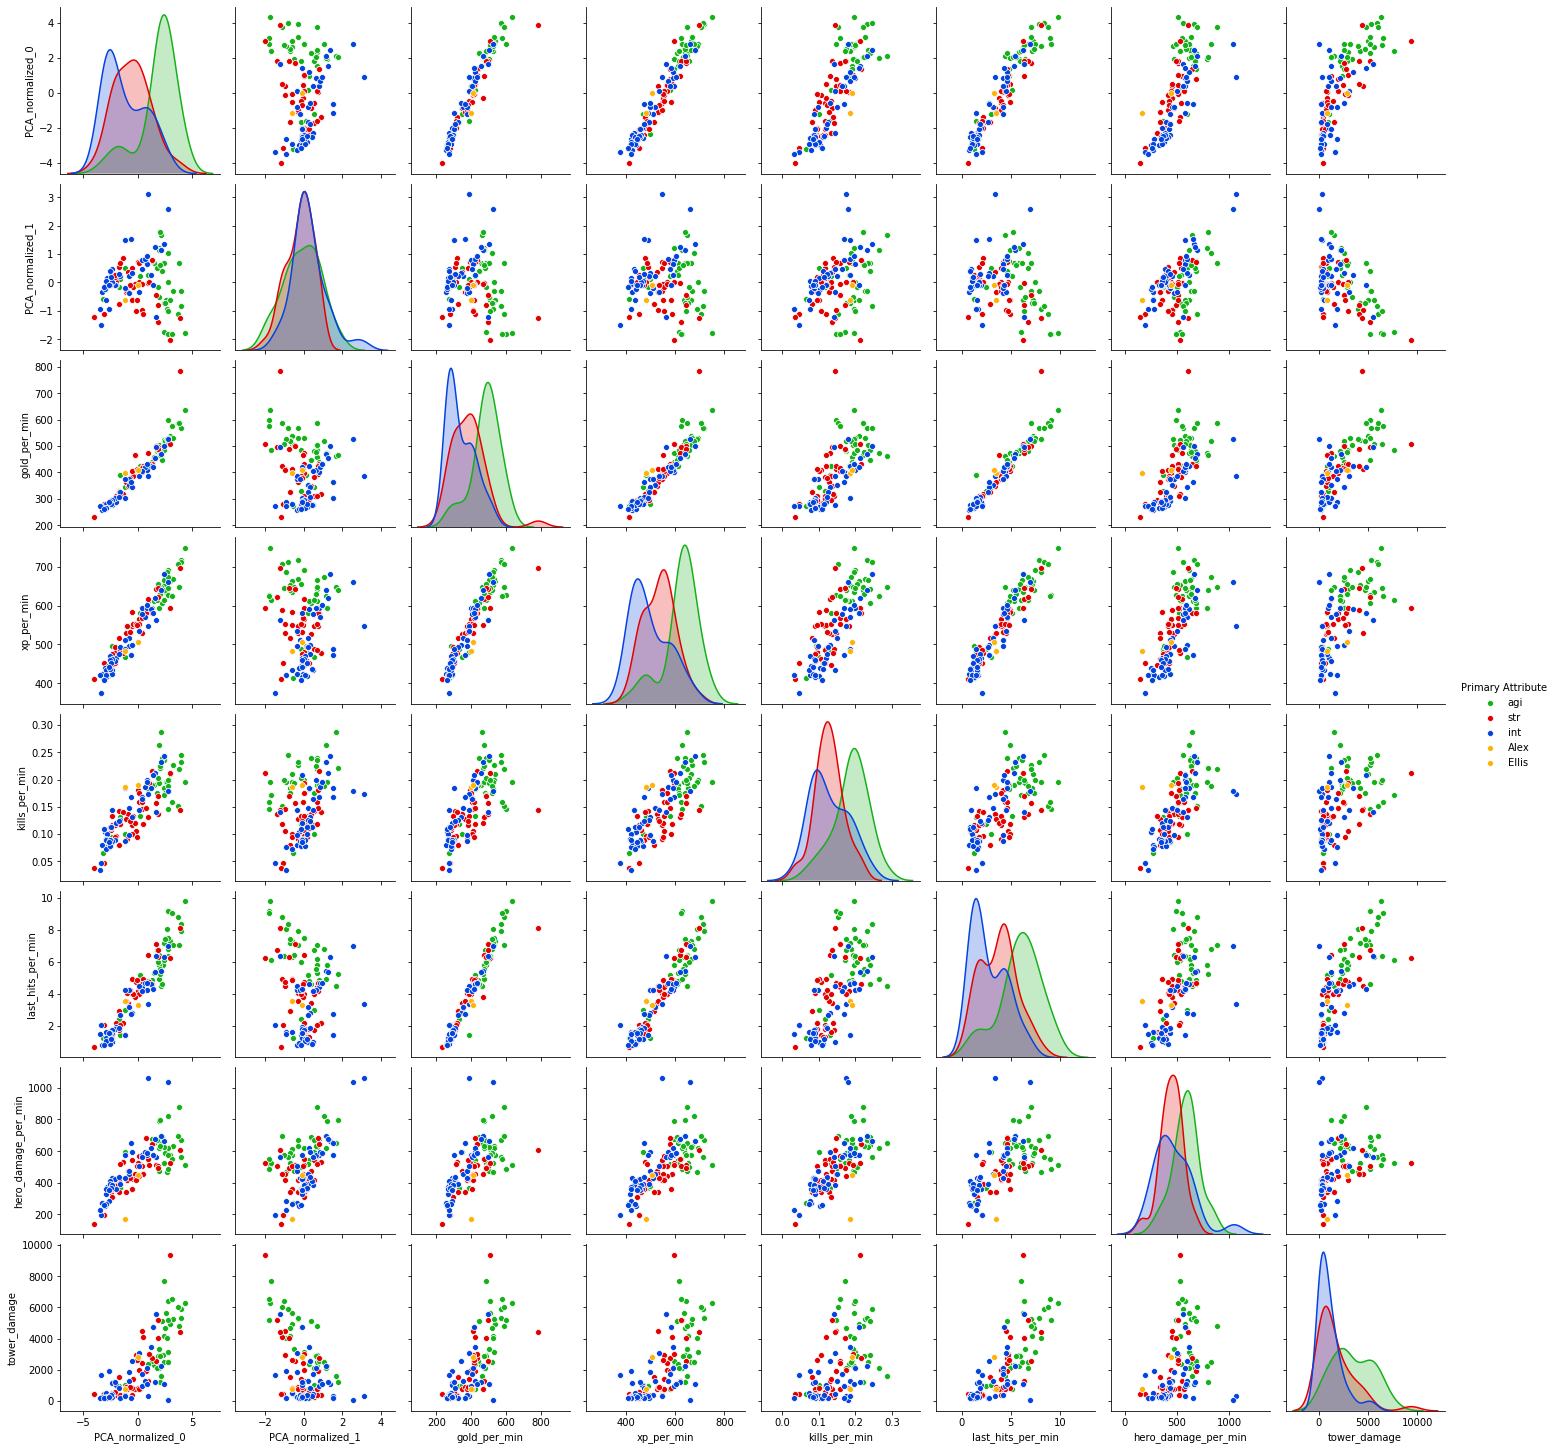

In [18]:
pairplot_data.insert(0, "PCA_normalized_0", X_r[:, 0])
pairplot_data.insert(1, "PCA_normalized_1", X_r[:, 1])
sns.pairplot(pairplot_data.drop(["PCA0", "PCA1"], axis=1), hue="Primary Attribute", 
             palette=palette)

### Clustering better after normalization
- as we move along the X-axis in pca_normalized_0, we have heroes who are heavier cores.

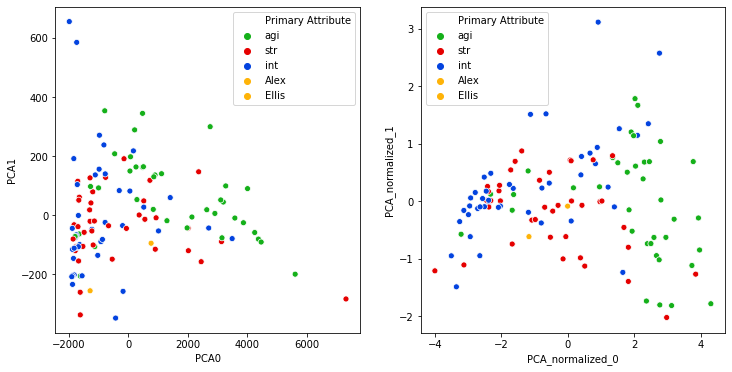

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x="PCA0", y="PCA1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[0])
sns.scatterplot(x="PCA_normalized_0", y="PCA_normalized_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[1])

### First principal component contains core vs support information

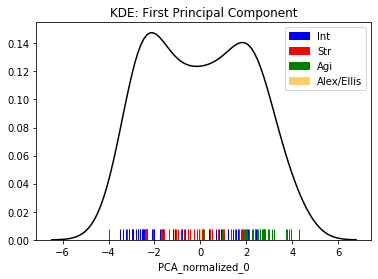

In [20]:
# color code by primary attribute
import matplotlib.patches as mpatches

colormap = {"agi": "green", "str": "red", "int": "blue", 
            "Alex": "#fecf66", "Ellis": "#fecf66"}
colors = list(pca_df["Primary Attribute"].map(colormap))

# kernel density estimation
sns.distplot(pca_df["PCA_normalized_0"], hist=False, rug=True, 
             rug_kws={"color": colors}, kde_kws={"color": "k"})
plt.title("KDE: First Principal Component");


# Make legend
intleg = mpatches.Patch(color='blue', label='Int')
strleg = mpatches.Patch(color='red', label='Str')
agileg = mpatches.Patch(color='green', label='Agi')
playleg = mpatches.Patch(color='#fecf66', label='Alex/Ellis')
plt.legend(handles=[intleg, strleg, agileg, playleg]);

plt.savefig("first_component.png", bbox_inches="tight",)

### Sort by first principal component and see heroes

In [21]:
pca_df.insert(0, "Hero", hero_stats["localized_name"])
pca_df.sort_values("PCA_normalized_0")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1
89,Io,str,-1611.783574,-336.835800,-3.998638,-1.209220
88,Keeper of the Light,int,-1871.997546,-233.526212,-3.504673,-0.948614
64,Chen,int,-424.852879,-347.549228,-3.352476,-1.487177
2,Bane,int,-1817.337165,-201.389505,-3.253100,-0.354213
19,Vengeful Spirit,agi,-1609.269828,-205.314380,-3.210708,-0.573551
109,Oracle,int,-1897.715631,-207.654030,-3.127873,-0.159849
55,Omniknight,str,-1615.044412,-260.146768,-3.125817,-1.107065
24,Lion,int,-1870.939785,-204.036229,-2.989288,-0.233966
77,Shadow Demon,int,-1839.396060,-145.709817,-2.953353,-0.082397
48,Dazzle,int,-1550.503699,-204.612046,-2.936198,-0.616155


### Grouped by type, sort by first principal component and see heroes

#### Strength heroes

In [22]:
strs = pca_df[pca_df["Primary Attribute"] == "str"]
strs.sort_values("PCA_normalized_0")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1
89,Io,str,-1611.783574,-336.835800,-3.998638,-1.209220
55,Omniknight,str,-1615.044412,-260.146768,-3.125817,-1.107065
69,Spirit Breaker,str,-1781.048925,-119.574919,-2.449484,0.015795
105,Earth Spirit,str,-1851.943143,-80.117827,-2.416118,0.256795
98,Tusk,str,-1757.717435,-105.778572,-2.390347,0.169905
81,Treant Protector,str,-1523.233326,-105.103293,-2.378402,-0.101119
83,Undying,str,-1669.203466,-154.414868,-2.317771,0.011586
101,Elder Titan,str,-1688.411767,-38.240082,-2.071588,0.180207
117,Snapfire,str,-1481.799026,-57.415434,-2.054632,0.276571
6,Earthshaker,str,-1652.048866,-63.345675,-2.030154,0.005131


#### Int heroes

In [23]:
ints = pca_df[pca_df["Primary Attribute"] == "int"]
ints.sort_values("PCA_normalized_0")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1
88,Keeper of the Light,int,-1871.997546,-233.526212,-3.504673,-0.948614
64,Chen,int,-424.852879,-347.549228,-3.352476,-1.487177
2,Bane,int,-1817.337165,-201.389505,-3.253100,-0.354213
109,Oracle,int,-1897.715631,-207.654030,-3.127873,-0.159849
24,Lion,int,-1870.939785,-204.036229,-2.989288,-0.233966
77,Shadow Demon,int,-1839.396060,-145.709817,-2.953353,-0.082397
48,Dazzle,int,-1550.503699,-204.612046,-2.936198,-0.616155
85,Disruptor,int,-1873.292360,-115.096445,-2.923398,0.056949
29,Lich,int,-1755.002191,-108.915573,-2.785838,0.151458
4,Crystal Maiden,int,-1720.193423,-110.331773,-2.712358,-0.126474


#### Agi heroes

In [24]:
agis = pca_df[pca_df["Primary Attribute"] == "agi"]
agis.sort_values("PCA_normalized_0")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1
19,Vengeful Spirit,agi,-1609.269828,-205.314380,-3.210708,-0.573551
86,Nyx Assassin,agi,-1785.853583,-71.614600,-2.324977,0.122582
8,Mirana,agi,-1124.836123,-105.752623,-1.674435,-0.156387
60,Bounty Hunter,agi,-1650.729991,-63.017556,-1.632035,0.115849
38,Venomancer,agi,-998.218460,92.888006,-1.196043,0.525688
114,Pangolier,agi,-1267.452815,97.655764,0.165867,0.232345
61,Weaver,agi,291.595945,53.344950,0.950051,0.249665
45,Viper,agi,509.397568,164.483835,1.345926,0.758101
14,Razor,agi,260.238496,163.774238,1.499971,0.667478
70,Gyrocopter,agi,76.132552,198.146514,1.783791,0.504133


### Sort by second principal component and see heroes

In [25]:
ints.sort_values("PCA_normalized_1")

,Hero,Primary Attribute,PCA0,PCA1,PCA_normalized_0,PCA_normalized_1
64,Chen,int,-424.852879,-347.549228,-3.352476,-1.487177
51,Nature's Prophet,int,3491.102341,-78.688306,1.650956,-1.236037
88,Keeper of the Light,int,-1871.997546,-233.526212,-3.504673,-0.948614
25,Shadow Shaman,int,-174.446495,-257.088676,-2.647435,-0.946711
48,Dazzle,int,-1550.503699,-204.612046,-2.936198,-0.616155
31,Enigma,int,-189.036130,-34.707926,-0.800720,-0.378087
2,Bane,int,-1817.337165,-201.389505,-3.253100,-0.354213
50,Leshrac,int,1016.362507,-52.789512,0.098715,-0.343912
24,Lion,int,-1870.939785,-204.036229,-2.989288,-0.233966
53,Dark Seer,int,-1675.515787,-0.364894,-1.186160,-0.192595


### Try L2 normalization

In [26]:
l2scaled = pd.DataFrame(preprocessing.normalize(scaled, norm='l2'), columns=data.columns)
l2scaled.head()

,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,0.487758,0.485748,0.188322,0.528327,0.017641,0.459604
1,-0.053020,-0.018340,0.698768,0.041581,0.188330,-0.686571
2,-0.431150,-0.432547,-0.393977,-0.445135,-0.441465,-0.280638
3,0.325888,0.423530,0.682194,0.300115,0.354531,0.182401
4,-0.424525,-0.439827,-0.485733,-0.431980,-0.318990,-0.319426


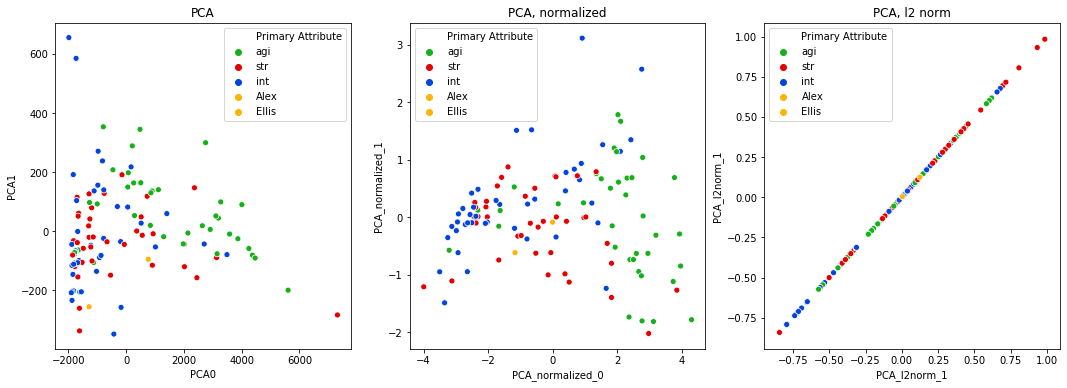

In [27]:
pca = PCA(n_components=2)
X_r = pca.fit(l2scaled).transform(l2scaled)
pca_df["PCA_l2norm_0"] = X_r[:, 0]
pca_df["PCA_l2norm_1"] = X_r[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x="PCA0", y="PCA1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[0])
sns.scatterplot(x="PCA_normalized_0", y="PCA_normalized_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[1])
sns.scatterplot(x="PCA_l2norm_1", y="PCA_l2norm_1", hue="Primary Attribute", data=pca_df, palette=palette, ax=axes[2])  # TIL L2 normalization doesn't work with PCA

axes[0].set_title("PCA")
axes[1].set_title("PCA, normalized")
axes[2].set_title("PCA, l2 norm")

plt.savefig("pca.png", bbox_inches="tight")

## Try other dimensionality reduction algorithms, all on normalized data

### Unsupervised methods

Text(0.5, 1.0, 'ICA')

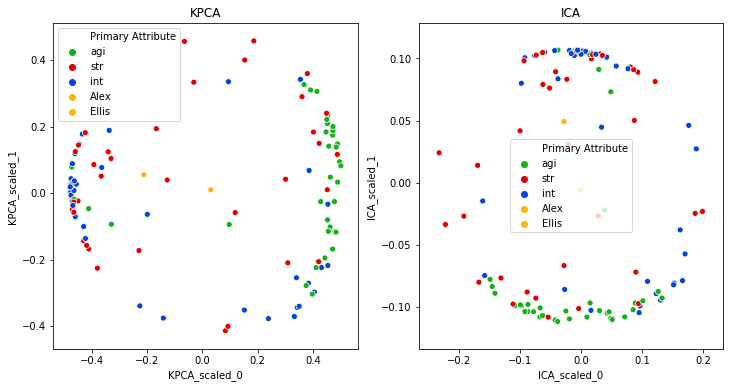

In [28]:
from sklearn.decomposition import KernelPCA, FastICA

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# KPCA
kpca = KernelPCA(kernel="rbf")
X_r = kpca.fit_transform(l2scaled)
pca_df["KPCA_scaled_0"] = X_r[:, 0]
pca_df["KPCA_scaled_1"] = X_r[:, 1]

sns.scatterplot(x="KPCA_scaled_0", y="KPCA_scaled_1", hue="Primary Attribute", 
                data=pca_df, palette=palette, ax=axes[0]);
axes[0].set_title("KPCA")

# ICA
ica = FastICA(n_components=2)
X_r = ica.fit_transform(l2scaled)
pca_df["ICA_scaled_0"] = X_r[:, 0]
pca_df["ICA_scaled_1"] = X_r[:, 1]

sns.scatterplot(x="ICA_scaled_0", y="ICA_scaled_1", hue="Primary Attribute", 
                data=pca_df, palette=palette, ax=axes[1]);
axes[1].set_title("ICA")

### Supervised methods

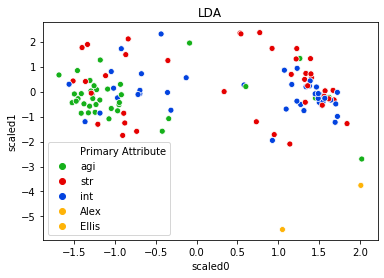

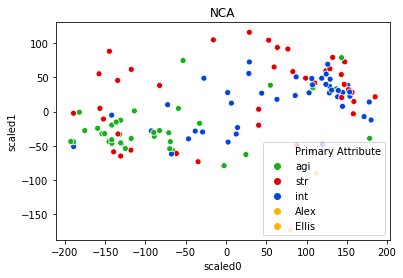

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split

# encode attribute labels as integers
le = LabelEncoder()
y = le.fit_transform(hero_stats["Primary Attribute"])

# # Divide into training/testing data
X_train, X_test, y_train, y_test = train_test_split(l2scaled, y)

# make models
lda = LinearDiscriminantAnalysis(n_components=2)
nca = NeighborhoodComponentsAnalysis(n_components=2)

# list out dimensionality reduction methods
dim_reduction_methods = [('LDA', lda), ('NCA', nca)]

# make models
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    
    # fit
    model.fit(X_train, y_train)
    X_r = model.transform(l2scaled)

    # plot
    df = pd.DataFrame(X_r, columns=["scaled0", "scaled1"])
    df["Primary Attribute"] = hero_stats["Primary Attribute"]
    sns.scatterplot(x="scaled0", y="scaled1", hue="Primary Attribute", 
                    data=df, palette=palette)
    plt.title(name)
    
    plt.savefig(f"supervised_{name}.png", bbox_inches="tight")

In [30]:
hero_stats.head()

,Primary Attribute,id,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,agi,1,Anti-Mage,636,750,0.195599,9.775744,511.295956,6298.0
1,str,2,Axe,396,548,0.181513,4.188679,524.611465,861.0
2,int,3,Bane,256,425,0.080000,0.775444,269.588504,253.0
3,agi,4,Bloodseeker,484,642,0.238758,5.809711,637.667185,2948.0
4,int,5,Crystal Maiden,282,444,0.078125,1.412429,360.545951,346.0
